In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ['SBIN.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'ITC.NS', 'TCS.NS', 'INFY.NS', 'ICICIBANK.NS']

start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

data = data['Adj Close']
data

Symbols,SBIN.NS,HDFCBANK.NS,RELIANCE.NS,ITC.NS,TCS.NS,INFY.NS,ICICIBANK.NS
Date,,,,,,,
2020-01-01,326.298187,1258.458008,1480.595825,205.544601,2075.235107,690.363220,531.990540
2020-01-02,331.029938,1266.479614,1505.802002,207.055313,2065.709229,688.348938,535.806335
2020-01-03,325.566467,1248.418701,1507.616455,205.889923,2106.876221,698.936096,534.071838
2020-01-06,311.224731,1221.401001,1472.651367,202.954803,2106.685303,692.237122,521.038513
2020-01-07,310.639374,1240.741455,1495.307617,203.170609,2111.855225,681.977966,518.263306
...,...,...,...,...,...,...,...
2022-11-17,599.049988,1618.150024,2599.050049,343.700012,3349.000000,1587.400024,919.799988
2022-11-18,602.700012,1613.900024,2597.649902,341.049988,3343.449951,1593.400024,920.349976
2022-11-21,598.099976,1597.349976,2550.899902,337.200012,3283.500000,1568.199951,921.400024


In [16]:
log_returns = np.log(data/data.shift())
start = dt.datetime(2020, 1, 1)
Nifty50 = pdr.get_data_yahoo("^NSEI", start)
log_returns['Nifty50'] = np.log(Nifty50['Adj Close']/Nifty50['Adj Close'].shift())
log_returns = log_returns.dropna()
log_returns


Symbols,SBIN.NS,HDFCBANK.NS,RELIANCE.NS,ITC.NS,TCS.NS,INFY.NS,ICICIBANK.NS,Nifty50
Date,,,,,,,,
2020-01-02,0.014397,0.006354,0.016881,0.007323,-0.004601,-0.002922,0.007147,0.008151
2020-01-03,-0.016642,-0.014363,0.001204,-0.005644,0.019733,0.015263,-0.003242,-0.004533
2020-01-06,-0.045051,-0.021879,-0.023465,-0.014358,-0.000091,-0.009631,-0.024706,-0.019291
2020-01-07,-0.001883,0.015711,0.015268,0.001063,0.002451,-0.014931,-0.005341,0.004982
2020-01-08,0.004387,-0.002621,-0.007538,-0.004898,0.022148,-0.013416,0.005816,-0.002293
...,...,...,...,...,...,...,...,...
2022-11-17,-0.001168,-0.009074,0.002581,-0.001163,-0.001894,-0.009655,0.006763,-0.003578
2022-11-18,0.006075,-0.002630,-0.000539,-0.007740,-0.001659,0.003773,0.000598,-0.001978
2022-11-21,-0.007662,-0.010308,-0.018161,-0.011353,-0.018093,-0.015942,0.001140,-0.008100


In [5]:
X = log_returns['SBIN.NS'].iloc[1:].to_numpy()
X           # gives you the row of values

array([ 1.43971695e-02, -1.66421763e-02, -4.50513810e-02, -1.88259086e-03,
        4.38734194e-03,  3.20028343e-02,  6.18915581e-03, -4.52499088e-03,
       -8.34913500e-03, -1.14987900e-02, -2.93424935e-03, -1.65292649e-02,
       -1.26583699e-02, -9.55791386e-04,  7.77958655e-03,  2.20545717e-02,
        2.62650581e-03, -2.45228844e-02, -3.48495026e-03,  4.27534293e-03,
       -1.83375755e-02,  2.46377378e-02, -6.60365113e-02,  2.69727663e-02,
        1.53911236e-02,  3.46034355e-02, -4.35807627e-03, -6.41578534e-03,
        1.82007515e-02, -1.28773128e-02,  2.23895151e-02, -2.48912309e-02,
       -1.64144651e-02,  1.06055389e-02,  8.77895059e-03,  2.25317178e-02,
       -1.44483761e-02,  1.18507660e-02,  4.27490672e-03, -1.92269001e-02,
       -6.06634857e-02, -5.28578978e-02,  8.48859258e-03, -1.58223554e-02,
        1.11538480e-02, -6.44229057e-02, -6.51055454e-02, -3.35002339e-02,
       -1.42253910e-01,  1.29525267e-01, -8.01975685e-02, -3.74046702e-02,
        2.32373952e-04, -

In [6]:
X1 = log_returns['SBIN.NS'].iloc[1:].to_numpy().reshape(-1,1)  # iloc[1:] because first value is NaN
X1         # gives you the column of values

array([[ 1.43971695e-02],
       [-1.66421763e-02],
       [-4.50513810e-02],
       [-1.88259086e-03],
       [ 4.38734194e-03],
       [ 3.20028343e-02],
       [ 6.18915581e-03],
       [-4.52499088e-03],
       [-8.34913500e-03],
       [-1.14987900e-02],
       [-2.93424935e-03],
       [-1.65292649e-02],
       [-1.26583699e-02],
       [-9.55791386e-04],
       [ 7.77958655e-03],
       [ 2.20545717e-02],
       [ 2.62650581e-03],
       [-2.45228844e-02],
       [-3.48495026e-03],
       [ 4.27534293e-03],
       [-1.83375755e-02],
       [ 2.46377378e-02],
       [-6.60365113e-02],
       [ 2.69727663e-02],
       [ 1.53911236e-02],
       [ 3.46034355e-02],
       [-4.35807627e-03],
       [-6.41578534e-03],
       [ 1.82007515e-02],
       [-1.28773128e-02],
       [ 2.23895151e-02],
       [-2.48912309e-02],
       [-1.64144651e-02],
       [ 1.06055389e-02],
       [ 8.77895059e-03],
       [ 2.25317178e-02],
       [-1.44483761e-02],
       [ 1.18507660e-02],
       [ 4.2

In [17]:
def linear_regression(ticker_a, ticker_b):
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_regr = LinearRegression()
    lin_regr.fit(X, Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0, 0]

    fig, ax = plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) + ", Beta: " + str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, c='r')

<IPython.core.display.Javascript object>


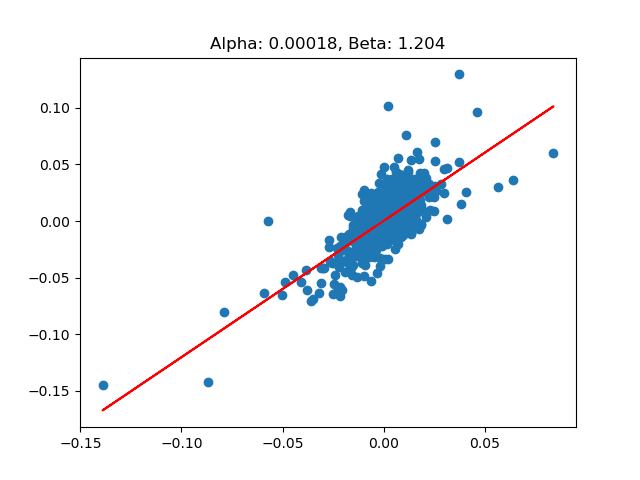

In [22]:
linear_regression("Nifty50", "SBIN.NS")

<IPython.core.display.Javascript object>


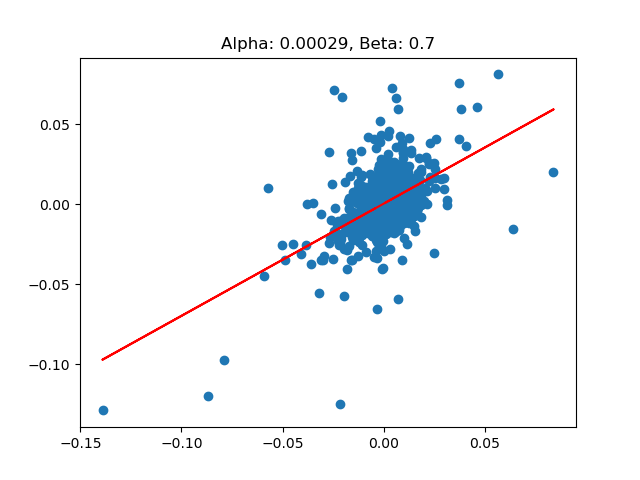

In [23]:
linear_regression("Nifty50", "ITC.NS")

<IPython.core.display.Javascript object>


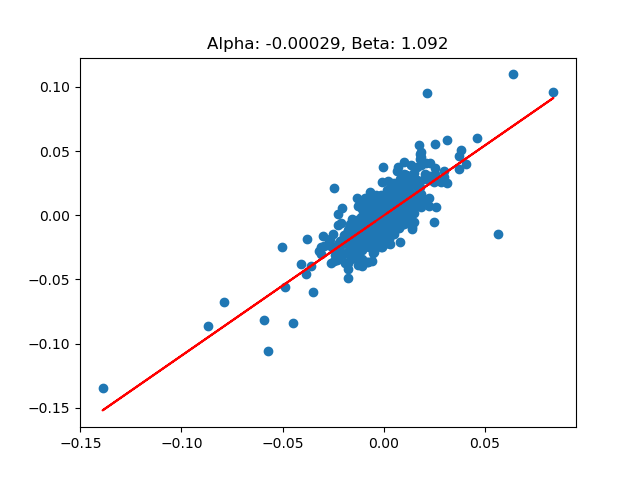

In [24]:
linear_regression("Nifty50", "HDFCBANK.NS")

<IPython.core.display.Javascript object>


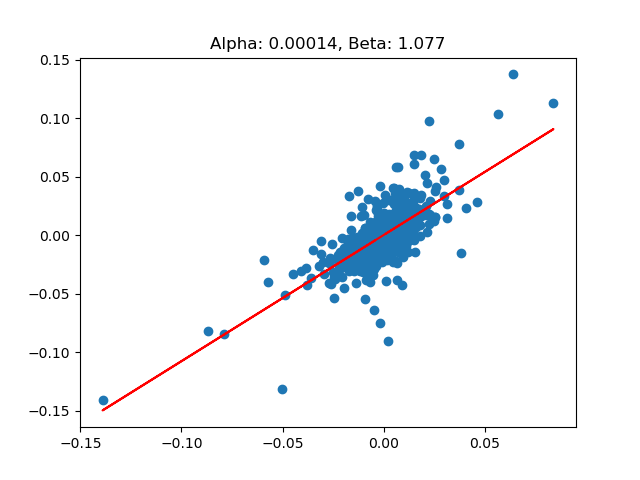

In [25]:
linear_regression("Nifty50", "RELIANCE.NS")